# Gravity Model fitting
------
* Due date: October 15, 2025

## Objectives
Our objectives are:
* Familiarize with, and practice, the interpretation of gravity data by a trial-and-error method of modeling.
* Understand the ambiguity between the recovered density, geometry, and depth of a causative body during gravity interpretation when the data contain varying error levels.
* Quantitatively interpret the gravity data you collected in the previous lab over the “possible” steam tunnel beneath the CSM campus.


In [1]:
import numpy as np
from grav_utils.grav_interact import GravInteract
import matplotlib.pyplot as plt
import pandas as pd

## Background
### Interactive Widget

The gravity modelling widget you used to forward model, can also load in observed data, additionally with its standard deviation, to compare against!

The controls are all the same, except that now your observation locations should be the same as your observed data locations, and you can additionally pass a data and standard deviation arrays.

You should also notice that when data are loaded into it, it displays a value called "misfit" representing how poorly the observed and predicted data match each other (the smaller the the closer it matches the observed data). In this widget, the misfit is defined as:

$$ \frac{1}{N_d}\sum_{i=1}^{N_d} \left(\frac{d_{pre,i} - d_{obs,i}}{\sigma_i}\right)^2$$

**New**: You can also easily get and set the value of the denisty programatically with
* `modeler.get_density()`
* `modeler.set_density(value)`

## Tasks


You will be interpreting three sets of data in this lab. The first two are supplied in the data files:
`data\obs1.grv` and `data\obs2.grv`. For the third data set, use the data you collected over the steam tunnel.

## Data Set 1


For the first part we will load in the `data/obs1.grv` csv data file using pandas

In [2]:
dat1_frame = pd.read_csv('07-lab/data/obs1.grv')
dat1_frame

,Profile (m),height (m),G_D (mGal),STD (mGal)
0,-2500.0,0,0.730,0.5
1,-2400.0,0,0.417,0.5
2,-2300.0,0,0.731,0.5
3,-2200.0,0,0.326,0.5
4,-2100.0,0,0.741,0.5
5,-2000.0,0,0.575,0.5
6,-1900.0,0,0.942,0.5
7,-1800.0,0,0.266,0.5
8,-1700.0,0,1.105,0.5
9,-1600.0,0,0.670,0.5


Then to make it a little clearer for the inputs to the modeler, let's collect the values of interest into there own variables.

In [3]:
obs1 = np.c_[dat1_frame['Profile (m)'], dat1_frame['height (m)']]
dat1 = dat1_frame['G_D (mGal)']
std1 = dat1_frame['STD (mGal)']

And finally pass it to the modeler.


### Question 1: 
Based on the responses you saw in previous labs, what do you think the model is?

In [4]:
modeler = GravInteract(obs1, dat1, std1)
modeler.set_density(1.4)
modeler.set_polygons([[[-256.84434572207124, -125.76539261087817], [-61.90051105849918, -132.66794099839865], [-97.18910794264292, -311.0828392257332], [-151.0761380890583, -625.7769278553957], [-4.8113419773583965, -825.3390328400601], [-551.3797906052896, -671.829721313395], [-297.34093420075817, -479.9430819050642], [-235.7557568905689, -364.8110982600657]]])
modeler

GravInteract(children=(FigureWidget({
    'data': [{'mode': 'lines',
              'type': 'scatter',
        …

### Question 2:
Now begin the process of trial-and-error modeling to interpret the data set and find three different polygons that each fit the data to within their standard deviations/ Remember to save the polygon models so you can reload them later, either with the `modeler.get_polygons()` and `modeler.load_polygons()` methods, or the save and load buttons on the widget. You can also get and set the density with `modeler.set_density()` and `modeler.get_density()`.

1) Find a dipping slab with four vertices and a density contrast of 1.0 g/cc

[array([[-300.27222688, -177.66293216],
        [ 154.43640062, -159.76517311],
        [-240.44214431, -696.69794465],
        [-509.67751586, -428.23155888]])]

In [5]:
modeler.get_polygons()

[array([[-256.84434572, -125.76539261],
        [ -61.90051106, -132.667941  ],
        [ -97.18910794, -311.08283923],
        [-151.07613809, -625.77692786],
        [  -4.81134198, -825.33903284],
        [-551.37979061, -671.82972131],
        [-297.3409342 , -479.94308191],
        [-235.75575689, -364.81109826]])]

2) Find a similar body with a density contrast of 0.6 g/cc, with a few more vertices (Likely starting from your model in part 1)
 [array([[ -470.82417211,  -195.83378986],
        [ -108.78562202,   -70.8819954 ],
        [   51.34681359,  -299.96028525],
        [   37.42225398,  -681.75743501],
        [  -80.93650278,  -772.00039768],
        [   65.27137321, -1237.09874375],
        [ -164.4838605 ,  -855.30159399],
        [ -394.23909421,  -494.32974331]])]

3) Find a model that has a density of 1.4 g/cc and a flat top.

**note**: For each of these cases, you should aim to get your data misfit close to 1.
Also, it could be helpful to create a new widget for each part of this question (with different variable names so they don't clobber each other)

## Data Set 2


For the second part we will load in the `data/obs2.grv` csv data file using pandas. You should notice that these data look similar to **Data Set 2**, but have a much lower standard deviation.

In [7]:
dat2_frame = pd.read_csv('07-lab/data/obs2.grv')
obs2= np.c_[dat2_frame['Profile (m)'], dat2_frame['height (m)']]
dat2 = dat2_frame['G_D (mGal)']
std2 = dat2_frame['STD (mGal)']

In [13]:
modeler_part2 = GravInteract(obs2, dat2, std2)
modeler_part2.set_polygons([[[-485.59968176203824, -322.85232112398467], [-352.46541535154785, -304.662819291446], [-153.4989348530242, -229.1384752742644], [-153.4989348530242, -79.19632191471216], [128.47339742821424, -122.9294499779148], [-122.1686757106641, -347.84268001724314], [-166.1749298744312, -528.6595709708564], [-291.35207507940703, -622.7366278430892], [-316.41628239329503, -891.3829859456202], [-598.3886146745335, -710.2028839694947]]])
modeler_part2

GravInteract(children=(FigureWidget({
    'data': [{'mode': 'lines',
              'type': 'scatter',
        …

### Question 3
1) Input the three models you found in the previous question (part 2), are they still acceptable models? Discuss why or why not.
   - Q2-1: Misfit 8.640
   - Q2-2: Misfit 95.164
   - Q2-3: Misfit 54.719
2) Pick one of the cases that is not acceptable, and find a new model that fits the data. Discuss the difference between the model derived for the `obs1.grv` data, and this model.


## Tunnel data
Now that you are hopefully comfortable with the process of trial-and-error modeling, lets attempt it with the data you collected over the tunnel.

1) Read in the processed gravity data (drift, free-air, and simple Bouguer corrected).
    * You will also need the *profile distance*, and height of each observation point.

**Note** you should read in your own data, the 2024 data is provided as an example

In [14]:
#load in code from lab 6

column_names = [
    "LINE","STATION","ALT","GRAV","SD","TILTX","TILTY","TEMP","TIDE",
    "DUR","REJ","TIME","DEC_TIME_DATE","TERRAIN","DATE"
]

dfcg5 = pd.read_csv('06-lab/data/grp2/CG5-2.TXT', sep=r'\s+', skiprows=52, header=None, names=column_names)

loc_data = pd.read_csv('06-lab/data/grp2/grp2-lab6.csv')
locdf = loc_data

loccols = ['STATION', 'Northing', 'Easting', 'ELEV', 'Notes']
locdf.columns = loccols[:len(locdf.columns)]

for col in ['Northing', 'Easting', 'ELEV']:
    if col in locdf.columns:
        locdf[col] = pd.to_numeric(locdf[col], errors = 'coerce')
locdf = locdf.drop(index = 15)

reorder = locdf.iloc[33:34]
locdf = locdf.drop(index = 34)
locdf_top = locdf.iloc[:24]
locdf_bottom = locdf.iloc[24:]

locdf = pd.concat([locdf_top, reorder, locdf_bottom]).reset_index(drop=True)

# clean columns
dfcg5['STATION'] = dfcg5['STATION'].astype(str).str.strip()
locdf['STATION'] = locdf['STATION'].astype(str).str.strip()

dfcg5['STATION_NUM'] = pd.to_numeric(dfcg5['STATION'], errors='coerce')
locdf['STATION_NUM'] = pd.to_numeric(locdf['STATION'], errors='coerce')

# merge data frames
df = pd.merge(dfcg5, locdf[['STATION_NUM', 'Northing', 'Easting', 'ELEV']],
              on='STATION_NUM', how='left')

df = df[['STATION_NUM', 'GRAV', 'Northing', 'Easting', 'TIME', 'ELEV', 'SD']]
df = df.sort_values('STATION_NUM')

In [15]:

dat_tunnel_frame = df
obs_tun_x = dat_tunnel_frame['STATION_NUM']
obs_tun_z = dat_tunnel_frame['ELEV']

# Note I'm subtracting the elevation at the base station here
# So I'm not working with elevations on the order of 1741...
obs_tunnel = np.c_[obs_tun_x, obs_tun_z-obs_tun_z[20]]
gz_tunnel = dat_tunnel_frame['GRAV']
std_tunnel = dat_tunnel_frame['SD']

Text(0.5, 1.0, 'Gz Observed')

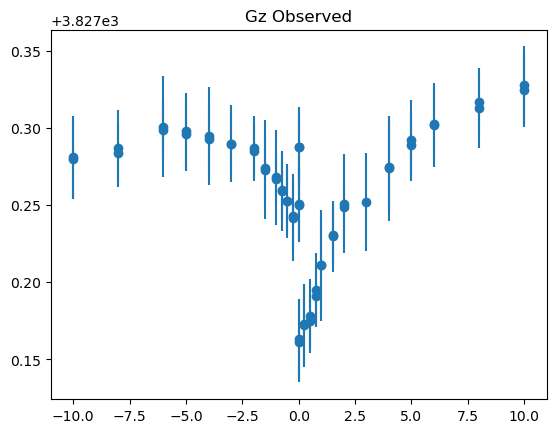

In [16]:
plt.scatter(obs_tunnel[:, 0], gz_tunnel)
plt.errorbar(obs_tunnel[:, 0], gz_tunnel, std_tunnel, ls='')
plt.title('Gz Observed')

2) You might have noticed in your previous lab that there was still a trend in your data set. We want to isolate the gravity anomaly due to the tunnels,
    * Fit a line to your data set (`np.polynomial.Polynomial.fit()`) as a function of profile distance and processed gravity
    * Remove that linear trend from your data set.

In [17]:
line = np.polynomial.Polynomial.fit(obs_tunnel[:, 0], gz_tunnel, deg=1)
# Note you could also weight this by the STD... since we have it
line_weighted = np.polynomial.Polynomial.fit(obs_tunnel[:, 0], gz_tunnel, deg=1, w=1/std_tunnel)

In [18]:
gz_tun_detrend = gz_tunnel - line_weighted(obs_tunnel[:, 0])

<ErrorbarContainer object of 3 artists>

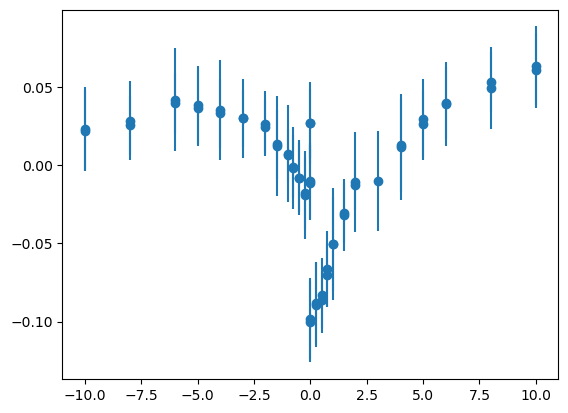

In [19]:
plt.scatter(obs_tunnel[:, 0], gz_tun_detrend)
plt.errorbar(obs_tunnel[:, 0], gz_tun_detrend, std_tunnel, ls='')

Start up the widget with this data.

3) Find a model that fits your data set, and is consistent with the prior information you have about the tunnel (think the measurements you took).
    * You can adjust the position and density contrast of the tunnel to make it fit the data!
    * Is there a range of density contrasts that could fit your data?

In [23]:
modeler_tun = GravInteract(obs_tunnel, gz_tun_detrend, std_tunnel)
# tunnel upper
tunnel_u = np.array([
    [-0.685, -0.30],
    [0.685, -0.30], 
    [0.685, -2.26],
    [-0.685, -2.26]
])

# tunnel lower
tunnel_l = np.array([
    [-0.683, -2.26],    
    [-2.207, -2.26],
    [-2.207, -4.105],
    [-0.683, -4.105]
])

modeler_tun.set_density(-2.62)
modeler_tun.set_polygons([tunnel_l, tunnel_u])
modeler_tun

GravInteract(children=(FigureWidget({
    'data': [{'mode': 'lines',
              'type': 'scatter',
        …

4) Discuss your ability to fit the data, and the quality of your recovered model in comparison to your previous knowledge of the tunnel(s).

# Deliverables
Submit an informal report in pdf form detailing:
1) Your name and lab title.
1) Your three interpreted models using the `obs1.grv` data set, with a brief description of each. (Include an image of the data fit, the model, and list the locations of the polygon’s nodes).
1) Plots showing how well your previous models fit the `obs2.grv` data, with a brief description of which models are still successful.
1) The new model you found that better fits `obs2.grv`, and discuss the updates and show the updated data.
1) Plots showing the model and data fit, as well as describe your chosen density contrast for the tunnel. Include the requested discussion from that section.
1) Address the following discussion points:
    1. How does the size of the model change as you decrease the assumed density contrast?
    2. Based on Gauss’s law, can you predict how the product of the density contrast and the area of the polygon will change? Will it increase, remain the same, or decrease as you increase density contrast?
    3. Can you uniquely determine the shapes of the sources that originally produced the data without knowledge of the density contrast? What if you do know the density contrast?
7. How do the errors in the data affect your interpretation?
